In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [69]:
fs1, x1 = wavfile.read('audio/TA0.wav')

In [70]:
t1 = np.arange(0, len(x1)/fs1, 1/fs1)

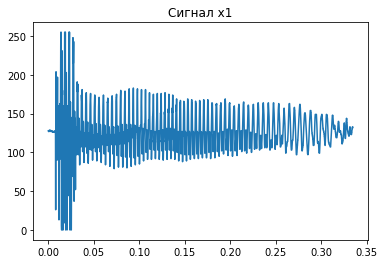

In [71]:
plt.plot(t1, x1)
plt.title('Сигнал x1')
plt.show()

In [67]:
x1 = x1[659:]
t1 = t1[659:]

---

In [6]:
fs2, x2 = wavfile.read('audio/TA50.wav')

In [7]:
t2 = np.arange(0, len(x2)/fs2, 1/fs2)

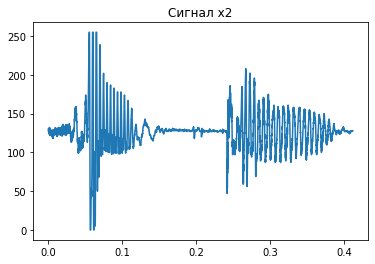

In [8]:
plt.plot(t2, x2)
plt.title('Сигнал x2')
plt.show()

In [9]:
x2 = x2[5288:]
t2 = t2[5288:]

---

In [10]:
N = 1024

In [11]:
1024/fs1

0.046439909297052155

In [12]:
spec_dw1_1024 = abs(np.fft.fft(x1, N))
t1 = t1[:N]

In [13]:
fff1 = np.arange(0, fs1, fs1/len(t1))

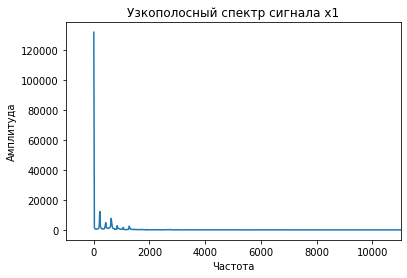

In [14]:
plt.plot(fff1[:N], spec_dw1_1024)
plt.title('Узкополосный спектр сигнала x1')
plt.xlim(-1000, fs1/2)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

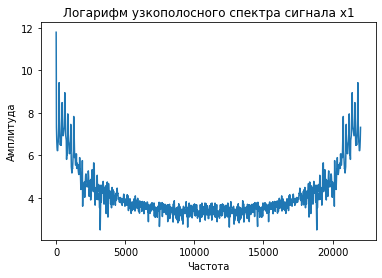

In [15]:
plt.plot(fff1[:N], np.log(spec_dw1_1024))
plt.title('Логарифм узкополосного спектра сигнала x1')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [16]:
N = 64

In [17]:
spec_dw1_64 = abs(np.fft.fft(x1, 64))
t1 = t1[:N]

In [18]:
fff1 = np.arange(0, fs1, fs1/len(t1))

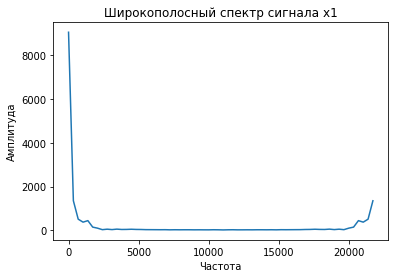

In [19]:
plt.plot(fff1[:N], spec_dw1_64)
plt.title('Широкополосный спектр сигнала x1')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

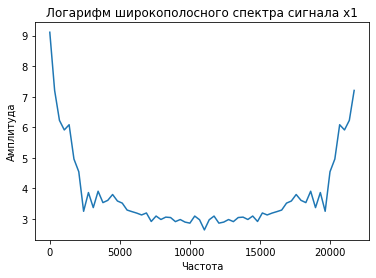

In [20]:
plt.plot(fff1, np.log(spec_dw1_64))
plt.title('Логарифм широкополосного спектра сигнала x1')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [21]:
N = 1024

In [22]:
spec_dw2_1024 = abs(np.fft.fft(x2, N))
t2 = t2[:N]

In [23]:
fff2 = np.arange(0, fs2, fs2/len(t2))

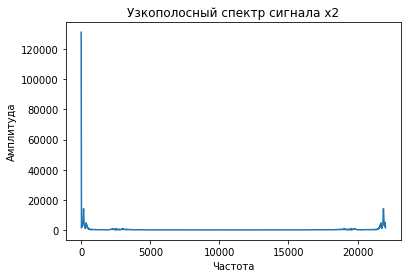

In [24]:
plt.plot(fff2, spec_dw2_1024)
plt.title('Узкополосный спектр сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

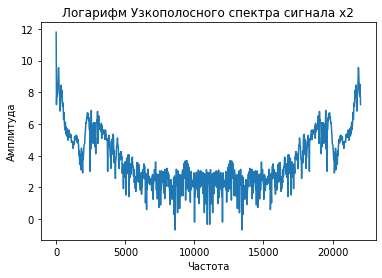

In [25]:
plt.plot(fff2, np.log(spec_dw2_1024))
plt.title('Логарифм Узкополосного спектра сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [26]:
N = 64

In [27]:
spec_dw2_64 =  abs(np.fft.fft(x2, N))
t2 = t2[:N]

In [28]:
fff2 = np.arange(0, fs2, fs2/len(t2))

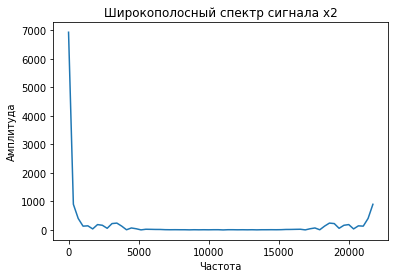

In [29]:
plt.plot(fff2, spec_dw2_64)
plt.title('Широкополосный спектр сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

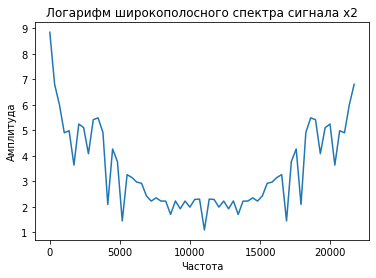

In [30]:
plt.plot(fff2, np.log(spec_dw2_64))
plt.title('Логарифм широкополосного спектра сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [31]:
R = 5
N = len(spec_dw1_1024)
P1 = spec_dw1_1024 

for r in range(2, R + 1):
    index = np.arange(1, N, r)
    dec = spec_dw1_1024[index]
    P1 = P1[:len(dec)] * dec

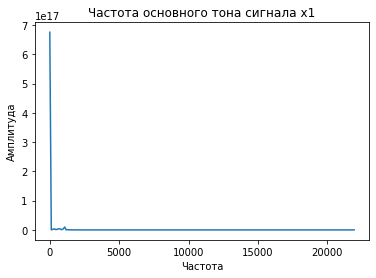

In [32]:
fff1 = np.arange(0, fs1, fs1/len(P1))
plt.plot(fff1, P1)
# plt.xlim(-1000, 3000)
plt.title('Частота основного тона сигнала x1')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [33]:
R = 5
N = len(spec_dw2_1024)
P2 = spec_dw2_1024 

for r in range(2, R + 1):
    index = np.arange(1, N, r)
    dec = spec_dw2_1024[index]
    P2 = P2[:len(dec)] * dec

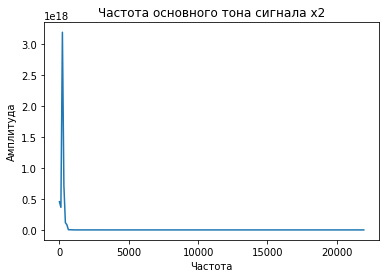

In [34]:
fff2 = np.arange(0, fs2, fs2/len(P2))
plt.plot(fff2, P2)
plt.title('Частота основного тона сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

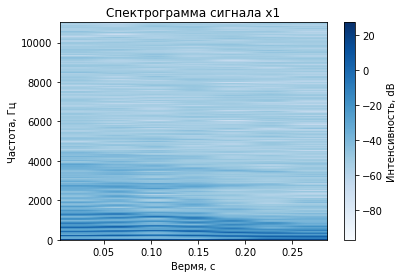

In [35]:
N = 1024

plt.specgram(x1, NFFT=N, Fs=fs1, 
        window=lambda data: data * np.hamming(len(data)), noverlap=int(N/8), cmap=plt.cm.Blues)
plt.colorbar().set_label('Интенсивность, dB')
plt.title('Спектрограмма сигнала x1')
plt.xlabel('Вермя, с')
plt.ylabel('Частота, Гц')
plt.show()

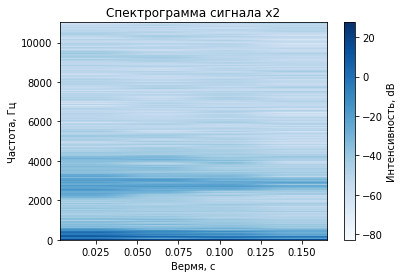

In [36]:
N = 1024

plt.specgram(x2, NFFT=N, Fs=fs2, 
        window=lambda data: data * np.hamming(len(data)), noverlap=int(N/8), cmap = plt.cm.Blues)
plt.colorbar().set_label('Интенсивность, dB')
plt.title('Спектрограмма сигнала x2')
plt.xlabel('Вермя, с')
plt.ylabel('Частота, Гц')
plt.show()

---

In [37]:
fs1, x1 = wavfile.read('audio/TA0.wav')

x1 = x1[3310:(3310+1024)]

N = len(x1)
w = scipy.signal.hamming(N)

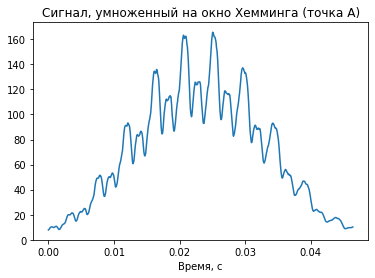

In [38]:
dw1 = x1 * w
t1 = np.arange(0, N/fs1, 1/fs1)
t1 = t1[:N]

plt.plot(t1, dw1)
plt.title('Сигнал, умноженный на окно Хемминга (точка A)')
plt.xlabel('Время, с')
plt.show()

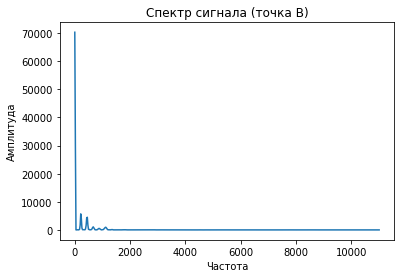

In [39]:
fff1 = np.arange(0, fs1, fs1/len(t1))
spec_dw1 = abs(np.fft.fft(dw1))

l1 = int(len(fff1)/2)

plt.plot(fff1[:l1], spec_dw1[:l1])
plt.title('Спектр сигнала (точка B)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

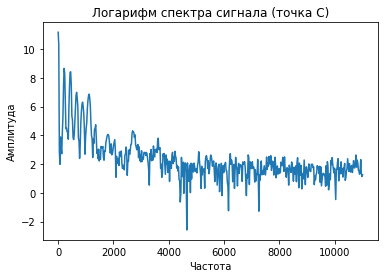

In [40]:
log_spec_dw1 = np.log(spec_dw1)

plt.plot(fff1[:l1], log_spec_dw1[:l1])
plt.title('Логарифм спектра сигнала (точка C)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

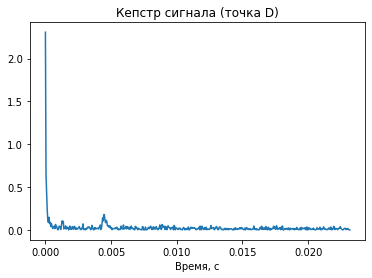

In [41]:
kepstr1 = abs(np.fft.ifft(log_spec_dw1))

plt.plot(t1[:l1], kepstr1[:l1])
plt.title('Кепстр сигнала (точка D)')
plt.xlabel('Время, с')
plt.show()

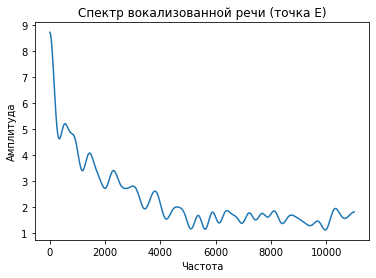

In [42]:
kw1 = kepstr1
kw1[int(len(kw1)/20):int(19 * len(kw1)/20)] = 0

spec_kw1 = abs(np.fft.fft(kw1))

plt.plot(fff1[:l1], spec_kw1[:l1])
plt.title('Спектр вокализованной речи (точка E)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

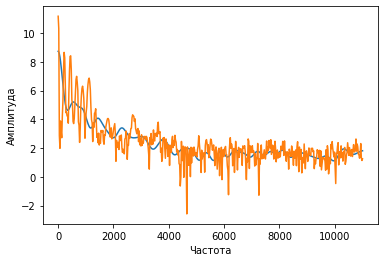

In [43]:
plt.plot(fff1[:int(len(fff1)/2)], spec_kw1[:int(len(fff1)/2)])
plt.plot(fff1[:l1], log_spec_dw1[:l1])
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

In [44]:
R = 5
N = len(spec_kw1)
P1 = spec_kw1

for r in range(2, R + 1):
    index = np.arange(1, N, r)
    dec = spec_kw1[index]
    P1 = P1[:len(dec)] * dec

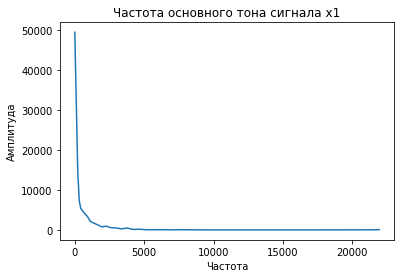

In [45]:
fff1 = np.arange(0, fs1, fs1/len(P1))
plt.plot(fff1, P1)
# plt.xlim(-1000, 3000)
plt.title('Частота основного тона сигнала x1')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [46]:
fs2, x2 = wavfile.read('audio/TA50.wav')

x2 = x2[6615:(6615+1024)]

N = len(x2)
w = scipy.signal.hamming(N)

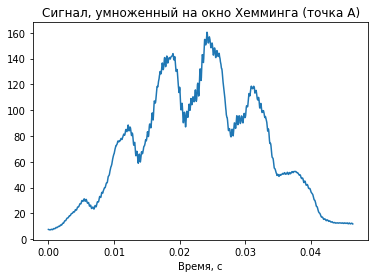

In [47]:
dw2 = x2 * w
t2 = np.arange(0, len(x2)/fs2, 1/fs2)

plt.plot(t2, dw2)
plt.title('Сигнал, умноженный на окно Хемминга (точка A)')
plt.xlabel('Время, с')
plt.show()

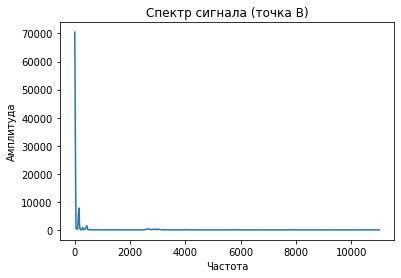

In [48]:
fff2 = np.arange(0, fs2, fs2/len(t2))
spec_dw2 = abs(np.fft.fft(dw2))

l2 = int(len(fff2)/2)

plt.plot(fff2[:l2], spec_dw2[:l2])
plt.title('Спектр сигнала (точка B)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

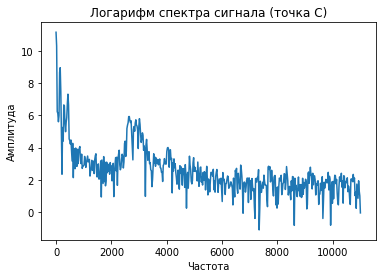

In [49]:
log_spec_dw2 = np.log(spec_dw2)

plt.plot(fff2[:l2], log_spec_dw2[:l2])
plt.title('Логарифм спектра сигнала (точка C)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

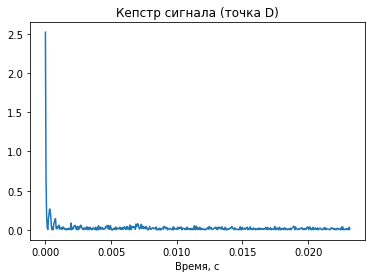

In [50]:
kepstr2 = abs(np.fft.ifft(log_spec_dw2))

plt.plot(t2[:l2], kepstr2[:l2])
plt.title('Кепстр сигнала (точка D)')
plt.xlabel('Время, с')
plt.show()

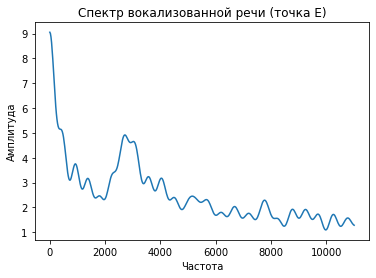

In [51]:
kw2 = kepstr2
kw2[int(len(kw2)/20):int(19*len(kw2)/20)] = 0

spec_kw2 = abs(np.fft.fft(kw2))

plt.plot(fff2[:l2], spec_kw2[:l2])
plt.title('Спектр вокализованной речи (точка E)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

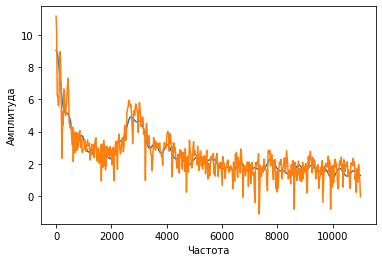

In [52]:
plt.plot(fff2[:l2], spec_kw2[:l2])
plt.plot(fff2[:l2], log_spec_dw2[:l2])
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

In [53]:
R = 5
N = len(spec_kw2)
P2 = spec_kw2

for r in range(2, R + 1):
    index = np.arange(1, N, r)
    dec = spec_kw2[index]
    P2 = P2[:len(dec)] * dec


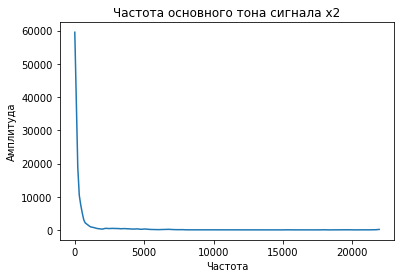

In [54]:
fff2 = np.arange(0, fs2, fs2/len(P2))
plt.plot(fff2, P2)
# plt.xlim(-1000, 3000)
plt.title('Частота основного тона сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [55]:
fs2, x2 = wavfile.read('audio/TA50.wav')

t2 = np.arange(0, len(x2)/fs2, 1/fs2)

In [56]:
x2 = x2[3970:4850]
t2 = t2[3970:4850]

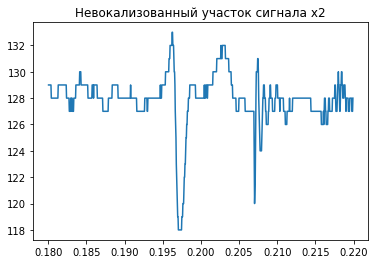

In [57]:
plt.plot(t2, x2)
plt.title('Невокализованный участок сигнала x2')
plt.show()

In [58]:
N = len(x2)
w = scipy.signal.hamming(N)

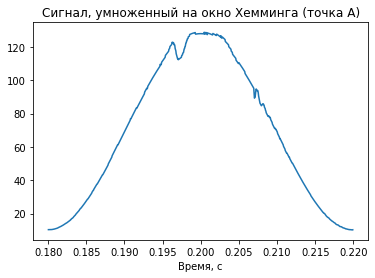

In [59]:
dw2 = x2 * w

plt.plot(t2, dw2)
plt.title('Сигнал, умноженный на окно Хемминга (точка A)')
plt.xlabel('Время, с')
plt.show()

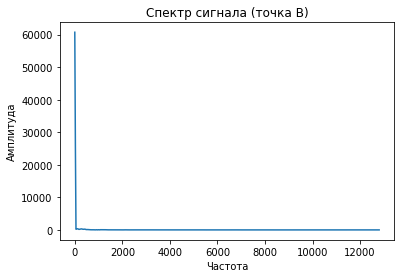

In [60]:
fff2 = np.arange(0, fs2, fs2/len(t2))
spec_dw2 = abs(np.fft.fft(dw2))

plt.plot(fff2[:l2], spec_dw2[:l2])
plt.title('Спектр сигнала (точка B)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

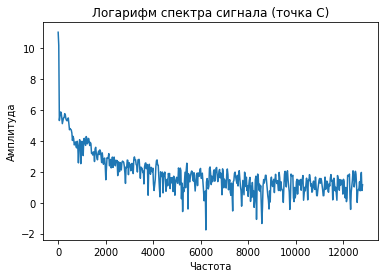

In [61]:
log_spec_dw2 = np.log(spec_dw2)

plt.plot(fff2[:l2], log_spec_dw2[:l2])
plt.title('Логарифм спектра сигнала (точка C)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

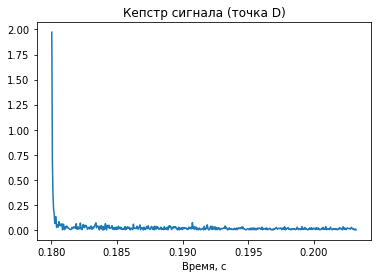

In [62]:
kepstr2 = abs(np.fft.ifft(log_spec_dw2))

plt.plot(t2[:l2], kepstr2[:l2])
plt.title('Кепстр сигнала (точка D)')
plt.xlabel('Время, с')
plt.show()

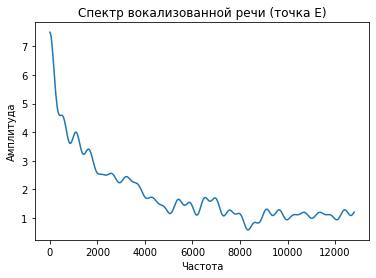

In [63]:
kw2 = kepstr2
kw2[int(len(kw2)/20):int(19 * len(kw2)/20)] = 0
spec_kw2 = abs(np.fft.fft(kw2))

plt.plot(fff2[:l2], spec_kw2[:l2])
plt.title('Спектр вокализованной речи (точка E)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

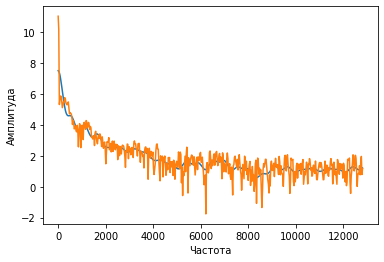

In [64]:
plt.plot(fff2[:l2], spec_kw2[:l2])
plt.plot(fff2[:l2], log_spec_dw2[:l2])
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

In [65]:
R = 5
N = len(spec_kw2)
P2 = spec_kw2

for r in range(2, R + 1):
    index = np.arange(1, N, r)
    dec = spec_kw2[index]
    P2 = P2[:len(dec)] * dec


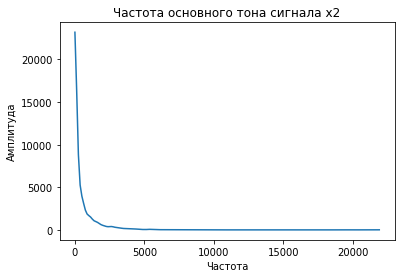

In [66]:
fff2 = np.arange(0, fs2, fs2/len(P2))
plt.plot(fff2, P2)
# plt.xlim(-1000, 3000)
plt.title('Частота основного тона сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()